In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [4]:
expname = 'xppl1001021'
run = 191
with h5py.File('/sdf/data/lcls/ds/xpp/{}/hdf5/smalldata/{}_Run{:04d}.h5'.format(expname, expname, run)) as f:
#     print (f.keys())
    diodes = f['diode2']['channels'][()]
    diodes = np.append(diodes, f['diodeU']['channels'][()], axis = 1)
    sample_diode = f['lombpm']['channels'][:,1]
    ipm2 = f['ipm2/sum'][()]
    cc_shutter = f['epicsAll/cc_shutter'][()] #fix-delay branch
    vcc_shutter = f['epicsAll/vcc_shutter'][()] #delayed branch

<IPython.core.display.Javascript object>


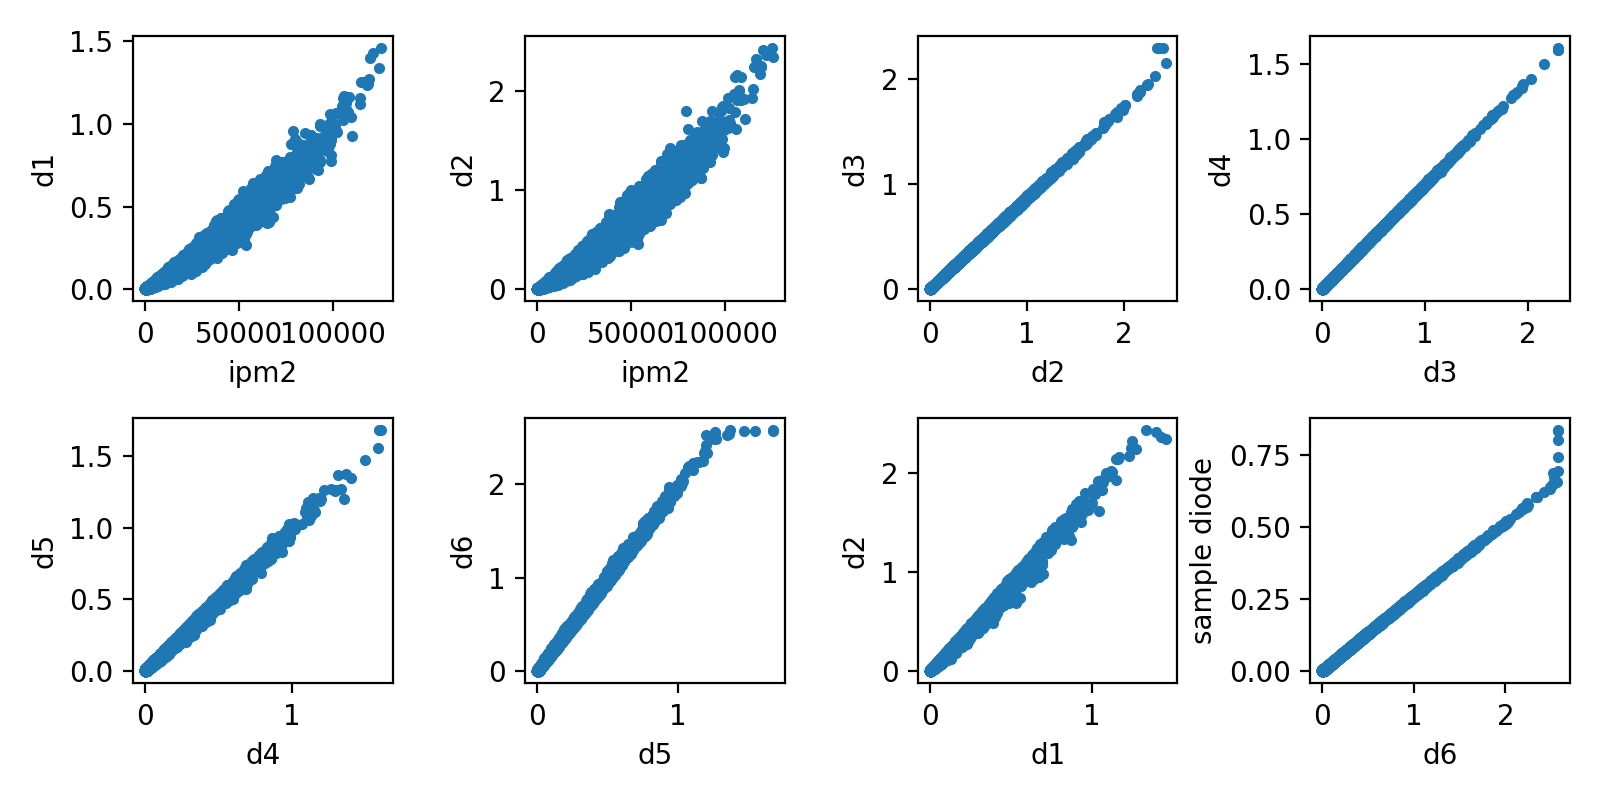

In [4]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (8,4))

axes[0,0].plot(ipm2, diodes[:,0], '.')
axes[0,0].set_xlabel('ipm2')
axes[0,0].set_ylabel('d1')

axes[0,1].plot(ipm2, diodes[:,1], '.')
axes[0,1].set_xlabel('ipm2')
axes[0,1].set_ylabel('d2')

axes[0,2].plot(diodes[:,1], diodes[:,2], '.')
axes[0,2].set_xlabel('d2')
axes[0,2].set_ylabel('d3')`

axes[0,3].plot(diodes[:,2], diodes[:,3], '.')
axes[0,3].set_xlabel('d3')
axes[0,3].set_ylabel('d4')


axes[1,0].plot(diodes[:,3], diodes[:,4], '.')
axes[1,0].set_xlabel('d4')
axes[1,0].set_ylabel('d5')


axes[1,1].plot(diodes[:,4], diodes[:,7], '.')
axes[1,1].set_xlabel('d5')
axes[1,1].set_ylabel('d6') #d6 sees both branches


axes[1,2].plot(diodes[:,0], diodes[:,1], '.')
axes[1,2].set_xlabel('d1')
axes[1,2].set_ylabel('d2')


axes[1,3].plot(diodes[:,7], sample_diode, '.')
axes[1,3].set_xlabel('d6')
axes[1,3].set_ylabel('sample diode')

plt.tight_layout()

<IPython.core.display.Javascript object>


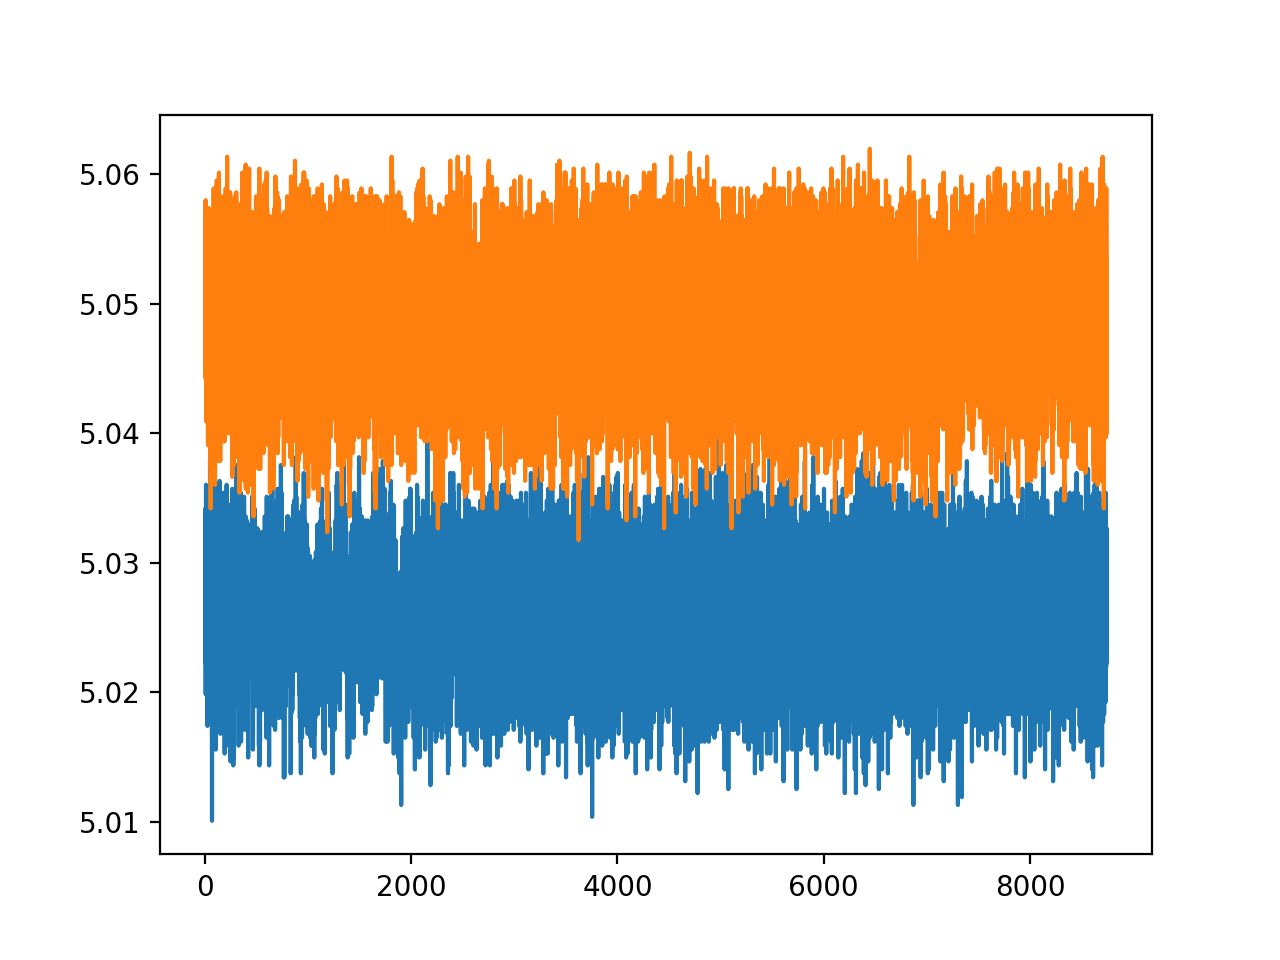

In [5]:
plt.figure()
plt.plot(cc_shutter)
plt.plot(vcc_shutter)